## Importing libraries

In [259]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data pre processing

In [260]:
data=np.array(
    [
        [0.4,2.6],
        [1.2,1.9],
        [0.4,1.7],
        [2,2.8],
        [2.8,2.3]
    ]
)
X=data[:,0].reshape(1,-1)
Y=data[:,1]

### Print shape

In [261]:
print(X.shape)
print(Y.shape)

(1, 5)
(5,)


### Plot data

In [262]:
def plotCanvas():
    f = plt.figure()
    f.set_figwidth(7)
    f.set_figheight(7)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.axhline(color='black',linestyle='dashed',lw=2)
    plt.axvline(color='black',linestyle='dashed',lw=2)

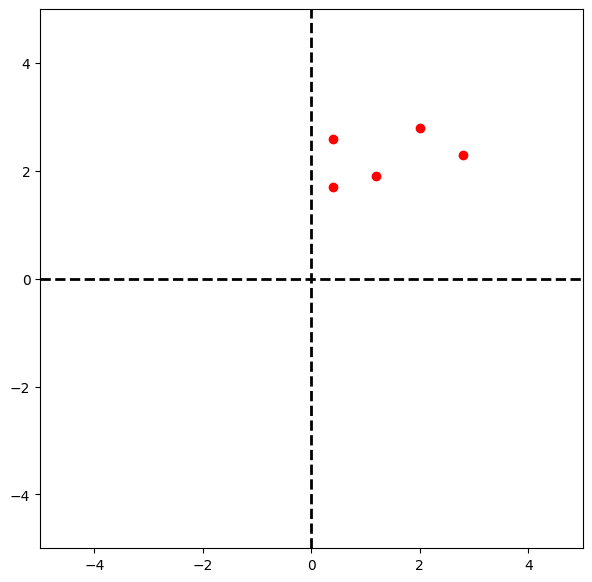

In [263]:
plotCanvas()
plt.plot(X[0,:],Y,'o',c='red')

### Adding features to data

In [264]:
degree=2

In [265]:
original_X=X

In [266]:
dummy=np.ones(X.shape[1])
X=np.row_stack((dummy,X))

In [267]:
for i in range(2,degree+1):
    X=np.row_stack((X,original_X**i))

### Print data

In [268]:
pd.DataFrame(X.T,columns=['X^0','X^1','X^2'])

,X^0,X^1,X^2
0,1.0,0.4,0.16
1,1.0,1.2,1.44
2,1.0,0.4,0.16
3,1.0,2.0,4.00
4,1.0,2.8,7.84


## Analytical Model

In [269]:
def weights(X,Y):
    return np.linalg.pinv(X@X.T)@X@Y

In [270]:
def predict(X,w):
    return X.T@w

### Generate weights and predict

In [271]:
w=weights(X,Y)

### Plot curve

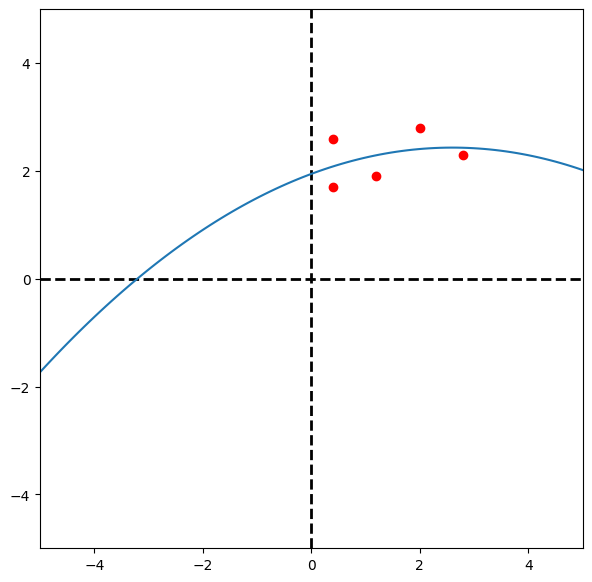

In [272]:
plotCanvas()
s=np.linspace(-5,5,100)
t=w[0]+w[1]*s+w[2]*(s**2)
plt.plot(original_X[0,:],Y,'o',c='red')
plt.plot(s,t)